# Getting the data

In [1]:
import pandas as pd

df_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alkalinity of ash', 'Magnesium', 'Phenolic content',
                  'Flavonoids', 'Non-flavonoid phenols', 'Proanthocyanidins', 'Color intensity', 'Shade',
                   'Transmittancy 280/315 nm', 'Proline']

In [2]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:,0].values

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [4]:
from sklearn.preprocessing import StandardScaler

stds = StandardScaler()

X_train_std = stds.fit_transform(X_train)
X_test_std = stds.transform(X_test)

# Let's play with L1 regularization

In [13]:
import matplotlib,numpy
# A random colormap for matplotlib
cmap = matplotlib.colors.ListedColormap ( numpy.random.rand ( 256,3))

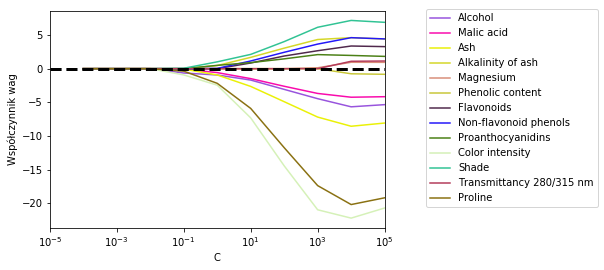

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
fig = plt.figure()
ax = plt.subplot(111)
weights, params = [], []
for c in np.arange(-4, 6):
    lr = LogisticRegression(penalty='l1',
                         C=10**int(c),
                         random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**int(c))
weights = np.array(weights)
colors = [cmap(v) for v in np.linspace(0, 1, weights.shape[1])]
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
            label=df_wine.columns[column+1],
            color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel("Współczynnik wag")
plt.xlabel("C")
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
         bbox_to_anchor=(1.38, 1.03),
         ncol=1)
plt.show()